In [2]:
import os
import json
import cv2
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def extract_license_plate_text(cropped_image):
    
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    _, thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((1, 1), np.uint8)
    img_dilated = cv2.dilate(thresh_image, kernel, iterations=1)
    text = pytesseract.image_to_string(img_dilated, config ='--oem 1 -l eng --psm 8')
    
    return text.strip()

def crop_license_plate(image_path, format_type="coco"):
    image = cv2.imread(image_path)
    image_name = image_path.split('/')[1]
    img_width = image.shape[1]
    img_height = image.shape[0]
    
    if format_type == "coco":

        with open('combined_coco_annotations.json', 'r') as j:
            data = json.loads(j.read())

        image_id = None
        for image_data in data["images"]:
            if image_data["file_name"] == image_name:
                image_id = image_data["id"]
                break
        if image_id is not None:
            bboxes = []
            for annotation in data["annotations"]:
                if annotation["image_id"] == image_id:
                    x_min, y_min, width, height = annotation["bbox"]
                    return image[y_min:y_min+height, x_min:x_min+width]


        
        
    elif format_type == "yolo":
        with open('combined_yolo_annotations.txt', 'r') as j:
            contents = j.readlines()
        for line in contents:
            if(line.split(',')[0] == image_name.split('.')[0]):
                contents = line.split(', ')
        contents.pop(0)
        contents.pop(0)
        contents[3]= contents[3].split("\n")[0]
        x_center, y_center, width, height = map(float, contents)
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        return image[y_min:y_min+int(height), x_min:x_min+int(width)]

def get_license_plate(image_path, format_type="coco"):
    image = cv2.imread(image_path)
    imgplot = plt.imshow(image)
    plt.show()
    cropped = crop_license_plate(image_path, format_type)
    imgplot = plt.imshow(cropped)
    plt.show()
    print("License Plate Number:", extract_license_plate_text(cropped))

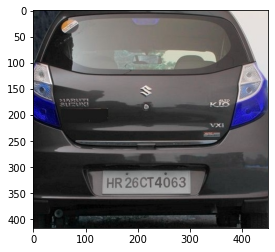

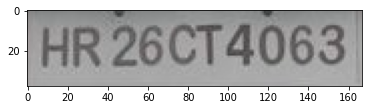

License Plate Number: HR 26CT4063


In [10]:
get_license_plate('images/N100.jpeg', "coco")